Lab 4
var 5
Data analysis and visualization.

In [1]:
import csv
import pandas as pd
import cv2 
import matplotlib.pyplot as plt

In [2]:
def read_file(path: str) -> list[list[str]]:
    '''
    Читает файл CSV и возвращает список списков, содержащих пути к файлам и классы.

    Аргументы:
    path (str): Путь к файлу CSV.

    Возвращает:
    list[list[str]]: Список списков, содержащих пути к файлам и классы.
    '''
    files: list[list[str]] = []
    with open(path, "r") as csvfile:
        reader: csv.DictReader = csv.DictReader(csvfile, delimiter=",")
        for row in reader:
            files.append([row["full_path"], row["class"]])
    return files

list_file_info: list[list[str]] = read_file("annotations_1.csv")

task 1

In [3]:
def create_df_two_columns(list_file_info: list[list[str]]) -> pd.DataFrame:
    """
    Создает DataFrame с двумя столбцами: "Name" и "Absolute Path" на основе переданного списка списков файловой информации.

    Args:
    list_file_info (list[list[str]]): Список списков файловой информации, где каждый внутренний список содержит имя файла и абсолютный путь.

    Returns:
    pd.DataFrame: DataFrame с двумя столбцами "Name" и "Absolute Path".
    """
    df_two_columns = pd.DataFrame(columns=["Name", "Absolute Path"])
    for file_info in list_file_info:
        df_two_columns.loc[len(df_two_columns)] = [file_info[1], file_info[0]]
    return df_two_columns

create_df_two_columns(list_file_info)

,Name,Absolute Path
0,brown bear,/Users/amirbajmukasev/pp_5/dataset/brown bear/...
1,brown bear,/Users/amirbajmukasev/pp_5/dataset/brown bear/...
2,brown bear,/Users/amirbajmukasev/pp_5/dataset/brown bear/...
3,brown bear,/Users/amirbajmukasev/pp_5/dataset/brown bear/...
4,brown bear,/Users/amirbajmukasev/pp_5/dataset/brown bear/...
...,...,...
1995,polar bear,/Users/amirbajmukasev/pp_5/dataset/polar bear/...
1996,polar bear,/Users/amirbajmukasev/pp_5/dataset/polar bear/...
1997,polar bear,/Users/amirbajmukasev/pp_5/dataset/polar bear/...
1998,polar bear,/Users/amirbajmukasev/pp_5/dataset/polar bear/...


task 2-4

In [4]:
def create_df(list_file_info: list[list[str]]) -> pd.DataFrame:
    """
    Создает DataFrame на основе переданного списка списков файловой информации, включая дополнительные столбцы "Class Id", "Width", "Height" и "Depth".

    Args:
    list_file_info (list[list[str]]): Список списков файловой информации, где каждый внутренний список содержит имя файла и абсолютный путь.

    Returns:
    pd.DataFrame: DataFrame с колонками "Name", "Absolute Path", "Class Id", "Width", "Height" и "Depth".
    """
    df = pd.DataFrame(columns=["Name", "Absolute Path", "Class Id", "Width", "Height", "Depth"])
    for file_info in list_file_info:
        class_id = 0 if file_info[1] == "brown bear" else 1
        im = cv2.imread(file_info[0])
        h, w, c = im.shape
        df.loc[len(df)] = [file_info[1], file_info[0], class_id, w, h, c]
    return df

df = create_df(list_file_info)
df

,Name,Absolute Path,Class Id,Width,Height,Depth
0,brown bear,/Users/amirbajmukasev/pp_5/dataset/brown bear/...,0,480,270,3
1,brown bear,/Users/amirbajmukasev/pp_5/dataset/brown bear/...,0,254,320,3
2,brown bear,/Users/amirbajmukasev/pp_5/dataset/brown bear/...,0,480,319,3
3,brown bear,/Users/amirbajmukasev/pp_5/dataset/brown bear/...,0,430,320,3
4,brown bear,/Users/amirbajmukasev/pp_5/dataset/brown bear/...,0,480,306,3
...,...,...,...,...,...,...
1995,polar bear,/Users/amirbajmukasev/pp_5/dataset/polar bear/...,1,323,320,3
1996,polar bear,/Users/amirbajmukasev/pp_5/dataset/polar bear/...,1,480,270,3
1997,polar bear,/Users/amirbajmukasev/pp_5/dataset/polar bear/...,1,480,320,3
1998,polar bear,/Users/amirbajmukasev/pp_5/dataset/polar bear/...,1,400,320,3


task 5

In [5]:
def calculate_static_info(df: pd.DataFrame) -> dict:
    """
    Вычисляет статистическую информацию (среднее) о высоте, ширине, глубине и классе изображений в DataFrame.

    Args:
    df (pd.DataFrame): DataFrame с колонками "Name", "Absolute Path", "Class Id", "Width", "Height" и "Depth".

    Returns:
    dict: Статистическая информация в виде словаря.
    """
    static_info = {"Height": df["Height"].mean(), "Width": df["Width"].mean(),
                   "Depth":  df["Depth"].mean(), "Class Id": df["Class Id"].mean()}
    return static_info

calculate_static_info(df)

{'Height': 308.031, 'Width': 438.307, 'Depth': 3.0, 'Class Id': 0.5}

task 6

In [6]:
def filter_df_by_class_id(df: pd.DataFrame, class_id: int) -> pd.DataFrame:
    """
    Фильтрует DataFrame по указанному идентификатору класса.

    Args:
    df (pd.DataFrame): Исходный DataFrame.
    class_id (int): Идентификатор класса для фильтрации.

    Returns:
    pd.DataFrame: Отфильтрованный DataFrame.
    """
    filtered_df = df.loc[df["Class Id"] == class_id]
    return filtered_df

filter_df_by_class_id(df, 1)

,Name,Absolute Path,Class Id,Width,Height,Depth
1000,polar bear,/Users/amirbajmukasev/pp_5/dataset/polar bear/...,1,480,270,3
1001,polar bear,/Users/amirbajmukasev/pp_5/dataset/polar bear/...,1,480,320,3
1002,polar bear,/Users/amirbajmukasev/pp_5/dataset/polar bear/...,1,477,320,3
1003,polar bear,/Users/amirbajmukasev/pp_5/dataset/polar bear/...,1,480,300,3
1004,polar bear,/Users/amirbajmukasev/pp_5/dataset/polar bear/...,1,320,320,3
...,...,...,...,...,...,...
1995,polar bear,/Users/amirbajmukasev/pp_5/dataset/polar bear/...,1,323,320,3
1996,polar bear,/Users/amirbajmukasev/pp_5/dataset/polar bear/...,1,480,270,3
1997,polar bear,/Users/amirbajmukasev/pp_5/dataset/polar bear/...,1,480,320,3
1998,polar bear,/Users/amirbajmukasev/pp_5/dataset/polar bear/...,1,400,320,3


task 7

In [7]:
def filter_df_by_size_and_class_id(df: pd.DataFrame, class_id: int, max_width: int, max_height: int) -> pd.DataFrame:
    """
    Фильтрует DataFrame по указанному идентификатору класса и максимальным значениям ширины и высоты.

    Args:
    df (pd.DataFrame): Исходный DataFrame.
    class_id (int): Идентификатор класса для фильтрации.
    max_width (int): Максимальная ширина.
    max_height (int): Максимальная высота.

    Returns:
    pd.DataFrame: Отфильтрованный DataFrame.
    """
    filtered_df_size = df.loc[(df["Class Id"] == class_id) & (df["Width"] <= max_width) & (df["Height"] <= max_height)]
    return filtered_df_size

filter_df_by_size_and_class_id(df, 1, 320, 320)

,Name,Absolute Path,Class Id,Width,Height,Depth
1004,polar bear,/Users/amirbajmukasev/pp_5/dataset/polar bear/...,1,320,320,3
1019,polar bear,/Users/amirbajmukasev/pp_5/dataset/polar bear/...,1,320,320,3
1024,polar bear,/Users/amirbajmukasev/pp_5/dataset/polar bear/...,1,240,320,3
1029,polar bear,/Users/amirbajmukasev/pp_5/dataset/polar bear/...,1,266,320,3
1048,polar bear,/Users/amirbajmukasev/pp_5/dataset/polar bear/...,1,310,320,3
...,...,...,...,...,...,...
1963,polar bear,/Users/amirbajmukasev/pp_5/dataset/polar bear/...,1,211,320,3
1967,polar bear,/Users/amirbajmukasev/pp_5/dataset/polar bear/...,1,320,320,3
1971,polar bear,/Users/amirbajmukasev/pp_5/dataset/polar bear/...,1,182,320,3
1990,polar bear,/Users/amirbajmukasev/pp_5/dataset/polar bear/...,1,226,320,3


task 8

In [8]:
def calculate_pixel_count_stats(df: pd.DataFrame) -> pd.DataFrame:
    """
    Вычисляет статистику количества пикселей для каждого класса изображений в DataFrame.

    Args:
    df (pd.DataFrame): DataFrame с колонками "Name", "Absolute Path", "Class Id", "Width", "Height" и "Depth".

    Returns:
    pd.DataFrame: DataFrame со статистикой количества пикселей.
    """
    df['Pixel Count'] = df['Height'] * df['Width'] * df['Depth']
    grouped_df = df.groupby('Class Id')['Pixel Count'].agg(['max', 'mean', 'min'])
    return grouped_df

calculate_pixel_count_stats(df)

,max,mean,min
Class Id,,,
0,460800,404118.24,170880
1,460800,403882.08,153600


task 9

In [9]:
def read_and_split_image(df: pd.DataFrame, class_id: int) -> tuple:
    """
    Читает изображение из DataFrame и разделяет его на каналы RGB на основе указанного идентификатора класса.

    Args:
    df (pd.DataFrame): Исходный DataFrame.
    class_id (int): Идентификатор класса для выборки изображения.

    Returns:
    tuple: Кортеж из трех массивов NumPy, представляющих каналы R, G и B изображения.
    """
    filter = df.loc[df["Class Id"] == class_id]
    path = filter["Absolute Path"].sample(1).values[0]
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    r, g, b = cv2.split(img)
    return r, g, b

r, g, b = read_and_split_image(df, 1)

task 10

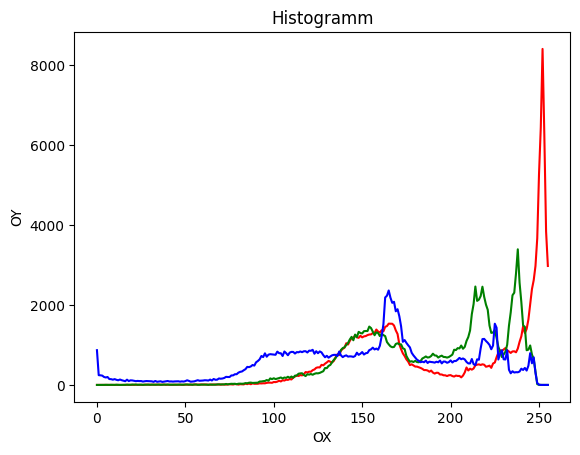

In [10]:
def plot_histograms(r, g, b):
    '''
    Строит гистограмму для каналов RGB изображения.

    Args:
    r (numpy.ndarray): Красный канал изображения.
    g (numpy.ndarray): Зеленый канал изображения.
    b (numpy.ndarray): Синий канал изображения.

    Returns:
    None
    '''
    plt.plot(range(256), cv2.calcHist([r], [0], None, [256], [0, 256]), color='red')
    plt.plot(range(256), cv2.calcHist([g], [0], None, [256], [0, 256]), color='green')
    plt.plot(range(256), cv2.calcHist([b], [0], None, [256], [0, 256]), color='blue')

    plt.xlabel("OX")
    plt.ylabel("OY")
    plt.title("Histogramm")

    plt.show()
plot_histograms(r, g, b)